# Evidence for prediction requires separating train and test data

A simple demonstration to set intuitions

In [1]:
# configuration of the display
%matplotlib inline
%config InlineBackend.close_figures=False

# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator, for reproducibility
np.random.seed(0)

## Define an (unknown) prediction mechanism

We use a degree 5 polynomial.

In [2]:
def f(x, noise=.5):
    return x - .1*x**2 - x**3 + .1*x**5 + noise*np.random.normal(size=x.shape)

## Define our statistical model

We will use a simple polynomial regression model (using [scikit-learn models](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features)).

In [3]:
# A polynomial regression model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(5), LinearRegression())

## The data available when fitting the model

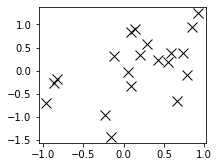

In [4]:
# Some data
x = np.random.uniform(low=-1, high=1, size=20)
y = f(x)

# Plot the data points
fig = plt.figure(figsize=(3, 2.5))
plt.plot(x, y, 'kx', markersize=10, label='Data used for model fit',
         zorder=100)

## Fit the model

And plot it's predictions

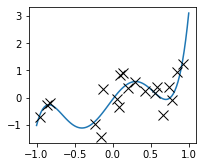

In [5]:
x_test = np.linspace(-1, 1, 100)

model.fit(x.reshape((-1, 1)), y)

plt.plot(x_test, model.predict(x_test.reshape((-1, 1))), color='C0',
         label='Model predictions')
fig

## New data (generalization error)

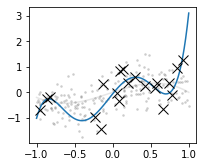

In [6]:
x_new = np.random.uniform(low=-1, high=1, size=200)
y_new = f(x_new)

plt.plot(x_test, f(x_test, noise=0), color='.9', zorder=0)
plt.plot(x_new, y_new, '.', color='k', alpha=.2, markersize=5,
         label='New data (generalization)', mec='none',
         zorder=0)
fig

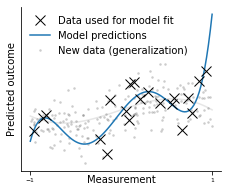

In [7]:
# Style the figure and save it
plt.xticks((-1, 1), size=6)
plt.yticks(())
plt.axis('tight')
plt.legend(loc='best', frameon=False)
plt.xlabel('Measurement', labelpad=-8)
plt.ylabel('Predicted outcome')

ax = plt.gca()
for spine in ['right', 'top']:
    spine = ax.spines[spine]
    spine.set_visible(False)
    
plt.tight_layout(pad=.1)
plt.savefig('generalization_error.pdf')
plt.savefig('generalization_error.png')
fig

The model seems to fit well the available data.

However, when evaluating its prediction on new data, it is clear that the prediction error is much larger.